#Introduction to Machine Learning - Capstone Project

In [1]:
import random
random.seed(11397327)

In [2]:
import pandas as pd
from tqdm import tqdm

In [3]:
output_csv = open("E:\OneDrive - NITT\Custom_Download\output.csv", "w")

with open('E:\OneDrive - NITT\Custom_Download\data.txt') as data_file:
    while True:
        line = data_file.readline()
        if line == "":
            # We've finished reading
            break

        if ":" in line:
            movie_id = int(line.strip(":\n"))
            #print(f"Movie id {line}")
        else:
            rating = line.strip("\n")
            #print(f"Found {rating} for {movie_id}")

            output_csv.write(f"{movie_id},{rating}\n")


output_csv.close()


In [4]:
data = pd.read_csv(r'E:\OneDrive - NITT\Custom_Download\output.csv', header=None)
data.columns = ['MovieIndex', 'UserID', 'Rating', 'Date']
data

,MovieIndex,UserID,Rating,Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
27010220,5000,2415316,3,2004-01-28
27010221,5000,1619362,3,2005-01-12
27010222,5000,453585,4,2005-03-28
27010223,5000,477466,3,2005-10-17


(array([4.645e+03, 1.790e+02, 7.000e+01, 3.200e+01, 2.300e+01, 2.500e+01,
        1.100e+01, 1.100e+01, 3.000e+00, 1.000e+00]),
 array([1.300000e+01, 1.940580e+04, 3.879860e+04, 5.819140e+04,
        7.758420e+04, 9.697700e+04, 1.163698e+05, 1.357626e+05,
        1.551554e+05, 1.745482e+05, 1.939410e+05]),
 <BarContainer object of 10 artists>)

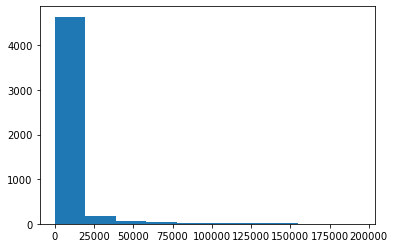

In [5]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# Plot Histogram on x
plt.hist(x=data['MovieIndex'].value_counts())

In [6]:
movie_info = pd.read_csv('E:\OneDrive - NITT\Custom_Download\movieTitles.csv', header=None)
movie_info = movie_info.iloc[:, :-2] # drops 2 empty columns
movie_info.columns = ['MovieIndex', 'ReleaseDate', 'MovieTitle']
movie_info

,MovieIndex,ReleaseDate,MovieTitle
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
4995,4996,2000.0,Gone in 60 Seconds
4996,4997,2004.0,Alabama Love Story
4997,4998,1948.0,Anna Karenina
4998,4999,2001.0,Lucky Break


In [7]:
df_combined = pd.merge(data, movie_info, on="MovieIndex", how="left")
df_combined

,MovieIndex,UserID,Rating,Date,ReleaseDate,MovieTitle
0,1,1488844,3,2005-09-06,2003.0,Dinosaur Planet
1,1,822109,5,2005-05-13,2003.0,Dinosaur Planet
2,1,885013,4,2005-10-19,2003.0,Dinosaur Planet
3,1,30878,4,2005-12-26,2003.0,Dinosaur Planet
4,1,823519,3,2004-05-03,2003.0,Dinosaur Planet
...,...,...,...,...,...,...
27010220,5000,2415316,3,2004-01-28,1994.0,Getting Even with Dad
27010221,5000,1619362,3,2005-01-12,1994.0,Getting Even with Dad
27010222,5000,453585,4,2005-03-28,1994.0,Getting Even with Dad
27010223,5000,477466,3,2005-10-17,1994.0,Getting Even with Dad


In [8]:
data['UserID'].value_counts()

305344     4963
387418     4915
2439493    4654
1664010    4462
2118461    4189
           ... 
1447773       1
2160937       1
1542706       1
1067682       1
325204        1
Name: UserID, Length: 472542, dtype: int64

In [9]:
len(data['UserID'].unique()) # num of unique users

472542

In [10]:
samples = pd.DataFrame(columns = ['MovieIndex', 'UserID', 'Rating', 'Date'])

In [11]:
data_copy = data.copy(deep=True)
data_copy

,MovieIndex,UserID,Rating,Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
27010220,5000,2415316,3,2004-01-28
27010221,5000,1619362,3,2005-01-12
27010222,5000,453585,4,2005-03-28
27010223,5000,477466,3,2005-10-17


# CODE

In [12]:
data = data[['MovieIndex','UserID','Rating']]

In [13]:
movie_indx = set(data['MovieIndex'])

In [14]:
x = data['UserID'].value_counts()

In [15]:
all_rating_df = [data]
len_data = len(set(data['MovieIndex']))*0.5

for user_id in tqdm(list(x[x>=len_data].index)):
    user = data.query(f"UserID=={user_id}")
    movie = movie_indx - set(user['MovieIndex'])
    df = pd.DataFrame({'MovieIndex':list(movie),
                        'UserID':[user_id]*len(movie),
                        'Rating' : [round(user['Rating'].mean())]*len(movie),
                      })
#     df = pd.concat([user,df])#.sort_values('MovieIndex')
    all_rating_df.append(df)
    
all_rating_df = pd.concat(all_rating_df)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  4.48it/s]


In [ ]:
# df_all.to_csv('preprocessed_data.csv')

In [17]:
all_rating_df

,MovieIndex,UserID,Rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
...,...,...,...
2486,4993,1932594,2
2487,4994,1932594,2
2488,4995,1932594,2
2489,4997,1932594,2


In [33]:
x = all_rating_df['UserID'].value_counts()

In [34]:
x[x>=1]

305344     5000
1314869    5000
1664010    5000
2439493    5000
1639792    5000
           ... 
1447773       1
2160937       1
1542706       1
1067682       1
325204        1
Name: UserID, Length: 472542, dtype: int64

In [32]:
len(all_rating_df)

27021267

In [36]:
y = all_rating_df.groupby('MovieIndex')['UserID'].count()

In [45]:
total_user = len(set(all_rating_df['UserID']))

In [68]:
total_user*0.1

47254.200000000004

In [70]:
imp_movie = y[y>total_user*0.1]

In [60]:
sum(list(y[y>189016]))

193941

In [74]:
imp_movie.index

Int64Index([  30,  175,  191,  197,  290,  299,  312,  313,  329,  357,
            ...
            4670, 4683, 4698, 4705, 4745, 4847, 4883, 4951, 4972, 4996],
           dtype='int64', name='MovieIndex', length=138)

In [75]:
all_rating_df[all_rating_df['MovieIndex'].isin(imp_movie.index)]

,MovieIndex,UserID,Rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
...,...,...,...
2486,4993,1932594,2
2487,4994,1932594,2
2488,4995,1932594,2
2489,4997,1932594,2


In [77]:
z = all_rating_df.groupby('UserID')['MovieIndex'].count()

In [83]:
user_imp = z[z>500]

In [98]:
df_all = all_rating_df[all_rating_df['UserID'].isin(user_imp.index)]

In [99]:
df_all

,MovieIndex,UserID,Rating
0,1,1488844,3
24,1,1181550,3
25,1,1227322,4
31,1,786312,3
36,1,525356,2
...,...,...,...
2486,4993,1932594,2
2487,4994,1932594,2
2488,4995,1932594,2
2489,4997,1932594,2


In [107]:
df_all_processed = pd.get_dummies(df_all, columns=['MovieIndex','UserID'])

In [108]:
df_all_processed.shape

(1217726, 5002)

In [111]:
df_all_processed.head()

,UserID,Rating,MovieIndex_1,MovieIndex_2,MovieIndex_3,MovieIndex_4,MovieIndex_5,MovieIndex_6,MovieIndex_7,MovieIndex_8,...,MovieIndex_4991,MovieIndex_4992,MovieIndex_4993,MovieIndex_4994,MovieIndex_4995,MovieIndex_4996,MovieIndex_4997,MovieIndex_4998,MovieIndex_4999,MovieIndex_5000
0,1488844,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,1181550,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1227322,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,786312,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,525356,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
len(data)

27010225

In [ ]:
27010225

# Dont touch

In [40]:
user = data[data['UserID']==1488844]

In [44]:
movie = movie_indx - set(user['MovieIndex'])

In [57]:
df = pd.DataFrame({'MovieIndex':list(movie),
 'UserID':[1488844]*len(movie),
 'Rating' : [round(user['Rating'].mean())]*len(movie),
})

In [63]:
df = pd.concat([user,df]).sort_values('MovieIndex')

In [64]:
df

,MovieIndex,UserID,Rating
0,1,1488844,3
0,2,1488844,3
1,3,1488844,3
2,4,1488844,3
3,5,1488844,3
...,...,...,...
26856966,4996,1488844,5
4396,4997,1488844,3
4397,4998,1488844,3
4398,4999,1488844,3


In [12]:
for index in range(1,5001):
  temp = data[data['MovieIndex']==index]
  sample = temp.sample()
  samples = samples.append(sample, ignore_index=True)
  idx = ((sample.index.tolist())[0])
  data_copy.drop(idx, axis=0, inplace=True)

KeyboardInterrupt: ignored

In [1]:
samples

NameError: ignored